In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Question - 1

In [2]:
x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

In [3]:
def mse(y, y_pred):
    return torch.mean((y - y_pred)**2)

tensor(10.1539, grad_fn=<MeanBackward0>)
tensor(1.4567, grad_fn=<MeanBackward0>)
tensor(0.2217, grad_fn=<MeanBackward0>)
tensor(0.0464, grad_fn=<MeanBackward0>)
tensor(0.0215, grad_fn=<MeanBackward0>)
tensor(0.0179, grad_fn=<MeanBackward0>)
tensor(0.0174, grad_fn=<MeanBackward0>)
tensor(0.0174, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)
tensor(0.0173, grad_fn=<MeanBackward0>)


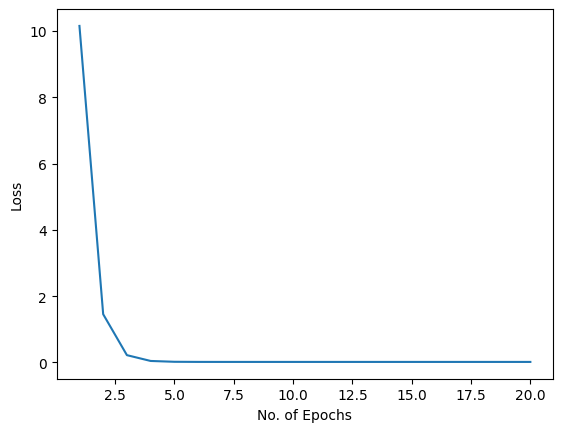

In [4]:
lr = 0.001
epochs = 20
w, b = torch.tensor(1., requires_grad=True), torch.tensor(1., requires_grad=True)
losses = []

for i in range(epochs):
    y_pred = w * x + b

    loss = mse(y, y_pred)

    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        losses.append(loss.detach())
        print(loss)
    w.grad.zero_()
    b.grad.zero_()
        
plt.plot(list(range(1,epochs+1)), losses)
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

## Question - 2

In [5]:
lr = 0.001
epochs = 2
w, b = torch.tensor(1., requires_grad=True), torch.tensor(1., requires_grad=True)

for i in range(epochs):
    y_pred = w * x + b

    loss = mse(y, y_pred)

    loss.backward()
    
    print(f"Epoch {i+1}: w_grad={w.grad.item()}, b_grad={b.grad.item()}")

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()
    
    print(f"Epoch {i+1}: Loss={loss.item()}\n")

Epoch 1: w_grad=112.22172546386719, b_grad=6.330434799194336
Epoch 1: Loss=10.153912544250488

Epoch 2: w_grad=42.28681564331055, b_grad=2.397820234298706
Epoch 2: Loss=1.4566776752471924



## Question - 3

In [6]:
class RegressionModel:
    def __init__(self, w, b, lr=0.001):
        self.w = torch.tensor(w, requires_grad=True)
        self.b = torch.tensor(b, requires_grad=True)
        self.lr = lr
        self.y = None
        self.loss = None
        self.losses = []
    
    def forward(self, x):
        self.y = self.w * x + self.b
        return self.y
    
    def update(self):
        self.loss.backward()
        with torch.no_grad():
            self.w -= self.lr * self.w.grad
            self.b -= self.lr * self.b.grad
    
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
    
    def criterion(self, y, yp):
        self.loss = torch.mean((y - y_pred)**2) 
        self.losses.append(self.loss.detach())
        return self.loss

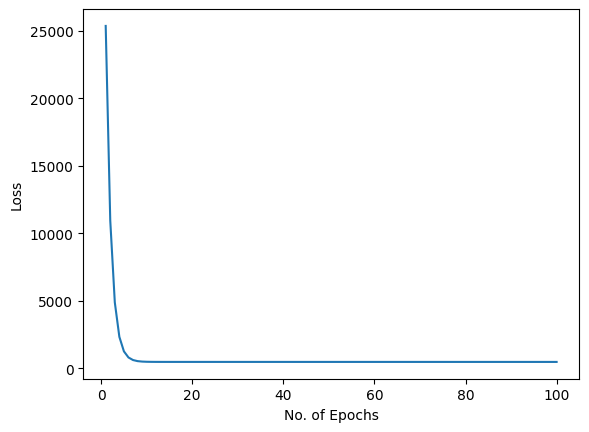

In [7]:
model = RegressionModel(1., 1.)
epochs = 100

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

for i in range(epochs):
    y_pred = model.forward(x)
    loss = model.criterion(y, y_pred)
    model.update()
    model.reset_grad()

plt.plot(np.arange(1, epochs+1), model.losses)
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

## Question - 4

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

def criterion(yp, y):
    return torch.mean((y - y_pred)**2) 

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

w = 1.
b = 1.

# Define the RegressionModel class inheriting from nn.Module
class RegressionModel(nn.Module):
    def __init__(self, w, b):
        super(RegressionModel, self).__init__()
        self.w = nn.Parameter(torch.tensor(w, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.tensor(b, requires_grad=True, dtype=torch.float))
    
    def forward(self, x):
        return self.w * x + self.b

# Custom Dataset to handle input and output data
class LinearDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
    
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

# Create the dataset and data loader
dataset = LinearDataset(x, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

# Initialize the model, loss function, and optimizer
model = RegressionModel(w, b)
#criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = model(batch_x)
        
        # Compute loss
        loss = criterion(y_pred, batch_y)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 13552.6689
Epoch [20/100], Loss: 6875.4150
Epoch [30/100], Loss: 3609.3821
Epoch [40/100], Loss: 2011.8713
Epoch [50/100], Loss: 1230.4796
Epoch [60/100], Loss: 848.2745
Epoch [70/100], Loss: 661.3213
Epoch [80/100], Loss: 569.8713
Epoch [90/100], Loss: 525.1349
Epoch [100/100], Loss: 503.2474


## Question - 5

Epoch [10/100], Loss: 0.0072
Epoch [20/100], Loss: 0.0020
Epoch [30/100], Loss: 0.0005
Epoch [40/100], Loss: 0.1476
Epoch [50/100], Loss: 0.0048
Epoch [60/100], Loss: 0.1395
Epoch [70/100], Loss: 0.0174
Epoch [80/100], Loss: 0.0035
Epoch [90/100], Loss: 0.0382
Epoch [100/100], Loss: 0.0011


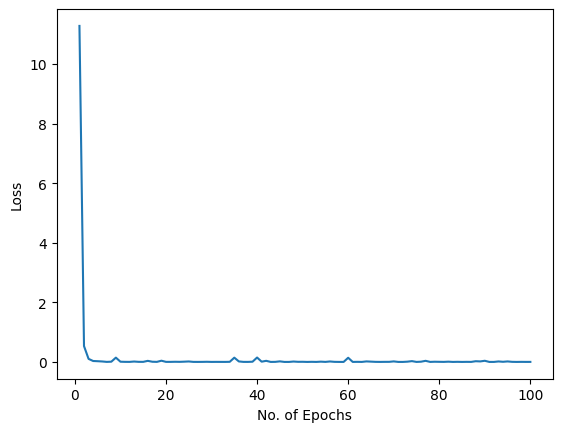

In [9]:
x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

losses = []

# Create the dataset and data loader
dataset = LinearDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Initialize the model, loss function, and optimizer
model = nn.Linear(1,1)
#criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = model(batch_x)
        
        # Compute loss
        loss = criterion(y_pred, batch_y)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(np.arange(1, num_epochs + 1), losses)
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

## Question - 6

Epoch [1/100], Loss: 12.3834
Epoch [2/100], Loss: 11.9640
Epoch [3/100], Loss: 11.5118
Epoch [4/100], Loss: 11.1089
Epoch [5/100], Loss: 10.7362
Epoch [6/100], Loss: 10.3819
Epoch [7/100], Loss: 10.0413
Epoch [8/100], Loss: 9.7126
Epoch [9/100], Loss: 9.3948
Epoch [10/100], Loss: 9.0875
Epoch [11/100], Loss: 8.7903
Epoch [12/100], Loss: 8.5028
Epoch [13/100], Loss: 8.2247
Epoch [14/100], Loss: 7.9558
Epoch [15/100], Loss: 7.6957
Epoch [16/100], Loss: 7.4440
Epoch [17/100], Loss: 7.2007
Epoch [18/100], Loss: 6.9653
Epoch [19/100], Loss: 6.7377
Epoch [20/100], Loss: 6.5175
Epoch [21/100], Loss: 6.3045
Epoch [22/100], Loss: 6.0985
Epoch [23/100], Loss: 5.8993
Epoch [24/100], Loss: 5.7067
Epoch [25/100], Loss: 5.5203
Epoch [26/100], Loss: 5.3401
Epoch [27/100], Loss: 5.1658
Epoch [28/100], Loss: 4.9972
Epoch [29/100], Loss: 4.8342
Epoch [30/100], Loss: 4.6766
Epoch [31/100], Loss: 4.5241
Epoch [32/100], Loss: 4.3766
Epoch [33/100], Loss: 4.2340
Epoch [34/100], Loss: 4.0961
Epoch [35/100], 

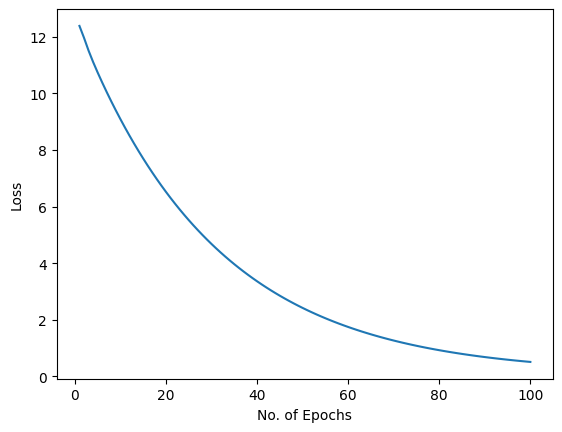

In [10]:
x1 = torch.tensor([3, 4, 5, 6, 2])
x2 = torch.tensor([8, 5, 7, 3, 1])
x = torch.stack((x1, x2), dim=1)
y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7])

losses = []

epochs = 20
w, b = [1., 1.], 1.

# Create the dataset and data loader
dataset = LinearDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Initialize the model, loss function, and optimizer
model = RegressionModel(w, b)
#criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = model(batch_x)
        
        # Compute loss
        loss = criterion(y_pred, batch_y)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
    
    losses.append(loss.detach())
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(np.arange(1, num_epochs+1), losses)
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()

## Question - 7

Loss for Epoch 10/200: 1.3185741901397705
Loss for Epoch 20/200: 1.2531628608703613
Loss for Epoch 30/200: 1.1903891563415527
Loss for Epoch 40/200: 1.1303671598434448
Loss for Epoch 50/200: 1.0731796026229858
Loss for Epoch 60/200: 1.0188769102096558
Loss for Epoch 70/200: 0.9674785137176514
Loss for Epoch 80/200: 0.9189727306365967
Loss for Epoch 90/200: 0.8733193278312683
Loss for Epoch 100/200: 0.8304525017738342
Loss for Epoch 110/200: 0.7902848124504089
Loss for Epoch 120/200: 0.7527111768722534
Loss for Epoch 130/200: 0.7176131010055542
Loss for Epoch 140/200: 0.6848623752593994
Loss for Epoch 150/200: 0.6543242931365967
Loss for Epoch 160/200: 0.6258624792098999
Loss for Epoch 170/200: 0.5993388295173645
Loss for Epoch 180/200: 0.5746187567710876
Loss for Epoch 190/200: 0.5515710711479187
Loss for Epoch 200/200: 0.5300692915916443


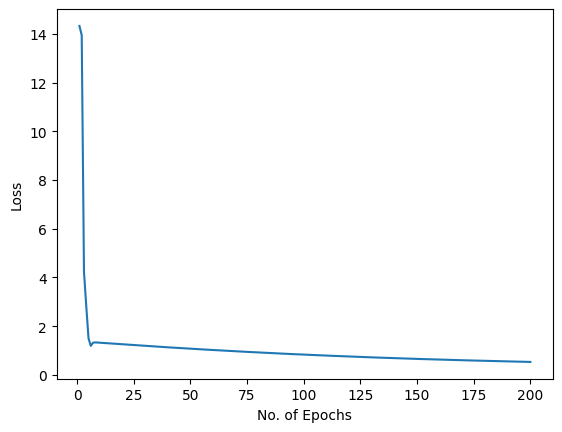

In [11]:
class LogisticModel(nn.Module):
    def __init__(self, w, b):
        super(LogisticModel, self).__init__()
        self.w = nn.Parameter(torch.tensor(w, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.tensor(b, requires_grad=True, dtype=torch.float))
    
    def forward(self, x):
        z = self.w * x + self.b
        #print("stuff:", self.w, x, self.b)
        return torch.sigmoid(z)   # 1 / (1 + torch.exp(-z))

x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float)

losses = []

epochs = 20
w, b = 1., 1.

# Create the dataset and data loader
dataset = LinearDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Initialize the model, loss function, and optimizer
model = LogisticModel(w, b)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    epoch_loss = []
    for batch_x, batch_y in dataloader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = model(batch_x)
        
        # Compute loss
        loss = criterion(y_pred, batch_y)
        
        # Backward pass
        loss.backward()
        epoch_loss.append(loss.detach())
        
        # Update weights
        optimizer.step()
    
    losses.append(sum(epoch_loss) / len(epoch_loss))
    if (epoch+1) % 10 == 0:
        print(f"Loss for Epoch {epoch+1}/{num_epochs}: {losses[-1]}")

plt.plot(np.arange(1, num_epochs+1), losses)
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.show()